In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [9]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
gdf = pd.read_csv('regssdatacsv.csv')

In [11]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [12]:
PORdf = gdf[gdf.Tm == 'POR']
BOSdf = gdf[gdf.Tm == 'BOS']


In [13]:
PORdf.Date = PORdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
PORdf = PORdf[(PORdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (PORdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

BOSdf.Date = BOSdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
BOSdf = BOSdf[(BOSdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (BOSdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

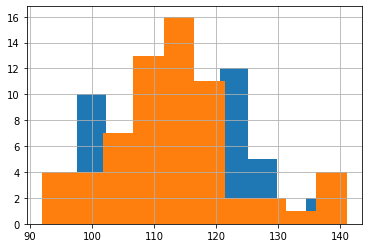

In [14]:
PORdf.TeamPTS.hist()
BOSdf.TeamPTS.hist()

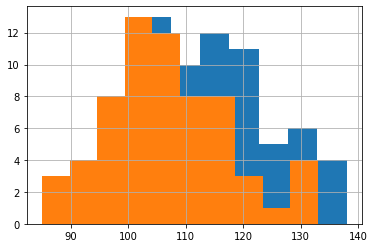

In [15]:
PORdf.OpponentPTS.hist()
BOSdf.OpponentPTS.hist()

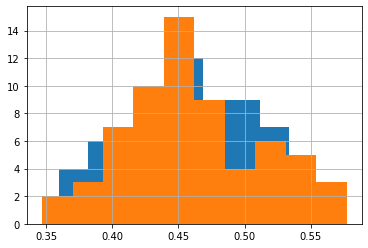

In [16]:
PORdf.TeamFGP.hist()
BOSdf.TeamFGP.hist()

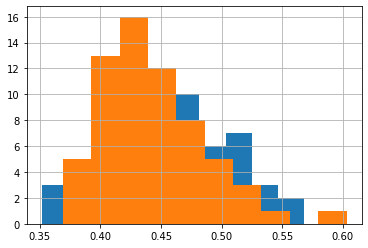

In [17]:
PORdf.OpponentFGP.hist()
BOSdf.OpponentFGP.hist()

In [18]:
PORmeanpts = PORdf.TeamPTS.mean()
BOSmeanpts = BOSdf.TeamPTS.mean()
PORfgp = PORdf.TeamFGP.mean()
BOSfgp = BOSdf.TeamFGP.mean()
PORsdpts = PORdf.TeamPTS.std()
BOSsdpts = BOSdf.TeamPTS.std()

PORmeaBOSp = PORdf.OpponentPTS.mean()
BOSmeaBOSp = BOSdf.OpponentPTS.mean()
PORfgpopp = PORdf.OpponentFGP.mean()
BOSfgpopp = BOSdf.OpponentFGP.mean()
PORsdopp = PORdf.OpponentPTS.std()
BOSsdopp = BOSdf.OpponentPTS.std()

print("POR Mean ", PORmeanpts)
print("POR FG% ", PORfgp)
print("POR Points Standard Deviation ", PORsdpts)
print("BOS Points Mean ", BOSmeanpts)
print("BOS FG% ", BOSfgp)
print("BOS Points Standard Deviation ", BOSsdpts)

print("POR OppPoints Mean ", PORmeaBOSp)
print("POR OppFG% Mean ", PORfgpopp)
print("POR OppPoints SD ", PORsdopp)
print("BOS OppPoints Mean ", BOSmeaBOSp)
print("BOS OppFG% Mean ", BOSfgpopp)
print("BOS OppPoints SD ", BOSsdopp)

POR Mean  113.63636363636364
POR FG%  0.4623787878787878
POR Points Standard Deviation  10.725435424026616
BOS Points Mean  113.0
BOS FG%  0.46034375000000005
BOS Points Standard Deviation  11.069764339844031
POR OppPoints Mean  115.24242424242425
POR OppFG% Mean  0.4524242424242424
POR OppPoints SD  10.59035934025428
BOS OppPoints Mean  106.828125
BOS OppFG% Mean  0.4423437499999999
BOS OppPoints SD  10.976966776080477


In [19]:
def gameSim():
    PORScore = (rnd.gauss(PORmeanpts,PORsdpts)+ rnd.gauss(BOSmeaBOSp,BOSsdopp))/2
    BOSScore = (rnd.gauss(BOSmeanpts,BOSsdpts)+ rnd.gauss(BOSmeaBOSp,BOSsdopp))/2
    if int(round(PORScore)) > int(round(BOSScore)):
        return 1
    elif int(round(PORScore)) < int(round(BOSScore)):
        return -1
    else: return 0

In [20]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('POR Win ', team1win/(team1win+team2win),'%')
    print('BOS Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [21]:
gAmesSim(10000)

POR Win  0.513078679676147 %
BOS Win  0.48692132032385305 %


[1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 0,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1